In [60]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

In [61]:
combined_results = pd.read_csv("my_results/combined_results.csv")

In [62]:
def capri_score(entry):
    # print(entry)
    f_nat = entry["fnat"]
    l_rmsd = entry["lrmsd"]
    i_rmsdbb = entry["irmsdbb"]


 
 
    if f_nat >= 0.5 and (l_rmsd <= 1 or i_rmsdbb <= 1.0):
        return 3 # "high"
    elif f_nat >= 0.3 and (l_rmsd <= 5 or i_rmsdbb <= 2.0):
        return 2 # "medium"
    elif f_nat >= 0.1 and (l_rmsd <= 10 or i_rmsdbb <=4.0):
        return 1 # "acceptable"
    elif f_nat < 0.1 or l_rmsd > 10.0 and i_rmsdbb > 4.0:
        return 0 # "incorrect"

    return -1
        

In [63]:
combined_results["capri"] = [capri_score(combined_results.iloc[iX]) for iX in range(len(combined_results))]

In [64]:
combined_results.sort_values(by=["structure_name", "structure_index"])

,nclash,fnat,fnonnat,tm-score,lddt,lrmsd,irmsdbb,irmsdsc,distance,theta,seqid,dockq,classification,clash_fraction,structure_name,structure_index,capri
32,8,0.8305,0.1250,0.6351,0.8769,4.2843,0.8830,1.4672,2.6739,6.3744,50.93,0.7902,"low_id,high",0.150943,8BK2,0,3
28,6,0.8136,0.1864,0.6360,0.8748,4.0489,0.9381,1.4645,2.5684,5.2843,50.93,0.7825,"low_id,high",0.113208,8BK2,1,3
33,6,0.7966,0.1607,0.6366,0.8733,3.8470,0.9524,1.6919,2.1081,5.5244,50.93,0.7798,"low_id,high",0.113208,8BK2,2,3
30,9,0.8305,0.1552,0.6337,0.8794,4.3749,0.8649,1.3931,2.6441,6.7068,50.93,0.7905,"low_id,high",0.169811,8BK2,3,3
31,8,0.8136,0.1429,0.6327,0.8727,4.3350,1.0495,1.7268,2.7396,7.0757,50.93,0.7595,"low_id,medium",0.150943,8BK2,4,2
15,18,0.0000,1.0000,0.3773,0.8389,55.2245,28.1685,27.8194,5.6784,173.0759,50.47,0.0087,"low_id,incorrect",0.473684,8CYH,0,0
21,14,0.0000,1.0000,0.3757,0.8346,54.9368,27.1026,26.8634,8.2028,171.1456,50.47,0.0088,"low_id,incorrect",0.368421,8CYH,1,0
19,20,0.0000,1.0000,0.3834,0.8370,54.9554,27.6106,27.3450,7.5594,168.8173,50.47,0.0088,"low_id,incorrect",0.526316,8CYH,2,0
18,12,0.0000,1.0000,0.3784,0.8400,55.1963,28.0326,27.7793,9.8117,161.8480,50.47,0.0087,"low_id,incorrect",0.315789,8CYH,3,0
20,4,0.0000,1.0000,0.3843,0.8437,56.9559,27.2371,26.8968,29.7509,130.2309,50.47,0.0083,"low_id,incorrect",0.105263,8CYH,4,0


In [65]:
parent_dir = "tmp/predictions/"
confidence_data = {}
for directory in os.listdir(parent_dir):
    structure_name = directory.split("_")[2]
    config_id = "_".join(directory.split("_")[3:])

    confidence_data[structure_name] = {}

    cur_dir = os.path.join(parent_dir, directory, "predictions/")
    for sub_directory in os.listdir(cur_dir):
        cur_sub_dir = os.path.join(cur_dir, sub_directory)
        for file in os.listdir(cur_sub_dir):

            if not os.path.splitext(file)[1] == ".json":
                continue
            structure_index = os.path.splitext(file)[0].split("_")[-1]


            file_path = os.path.join(cur_sub_dir, file)
            print(structure_name, config_id, structure_index, file_path)
            with open(file_path, "r") as f:
                json_data = json.load(f)

            confidence_data[structure_name][int(structure_index)] = json_data




8JEL config_0 2 tmp/predictions/boltz_results_8JEL_config_0/predictions/8JEL_config_0/confidence_8JEL_config_0_model_2.json
8JEL config_0 3 tmp/predictions/boltz_results_8JEL_config_0/predictions/8JEL_config_0/confidence_8JEL_config_0_model_3.json
8JEL config_0 4 tmp/predictions/boltz_results_8JEL_config_0/predictions/8JEL_config_0/confidence_8JEL_config_0_model_4.json
8JEL config_0 0 tmp/predictions/boltz_results_8JEL_config_0/predictions/8JEL_config_0/confidence_8JEL_config_0_model_0.json
8JEL config_0 1 tmp/predictions/boltz_results_8JEL_config_0/predictions/8JEL_config_0/confidence_8JEL_config_0_model_1.json
8V52 config_0 2 tmp/predictions/boltz_results_8V52_config_0/predictions/8V52_config_0/confidence_8V52_config_0_model_2.json
8V52 config_0 3 tmp/predictions/boltz_results_8V52_config_0/predictions/8V52_config_0/confidence_8V52_config_0_model_3.json
8V52 config_0 4 tmp/predictions/boltz_results_8V52_config_0/predictions/8V52_config_0/confidence_8V52_config_0_model_4.json
8V52 con

In [66]:
relevant_json_keys = [key for key in json_data if isinstance(json_data[key], float)]

for key in relevant_json_keys:
    new_col = []
    for iX in range(len(combined_results)):
        structure_name = combined_results.iloc[iX]["structure_name"]
        structure_index = combined_results.iloc[iX]["structure_index"]
        cur_data = confidence_data[structure_name][structure_index]
        value = cur_data[key]
        new_col.append(value)

    combined_results[key] = new_col

confidence_score
ptm
iptm
ligand_iptm
protein_iptm
complex_plddt
complex_iplddt
complex_pde
complex_ipde


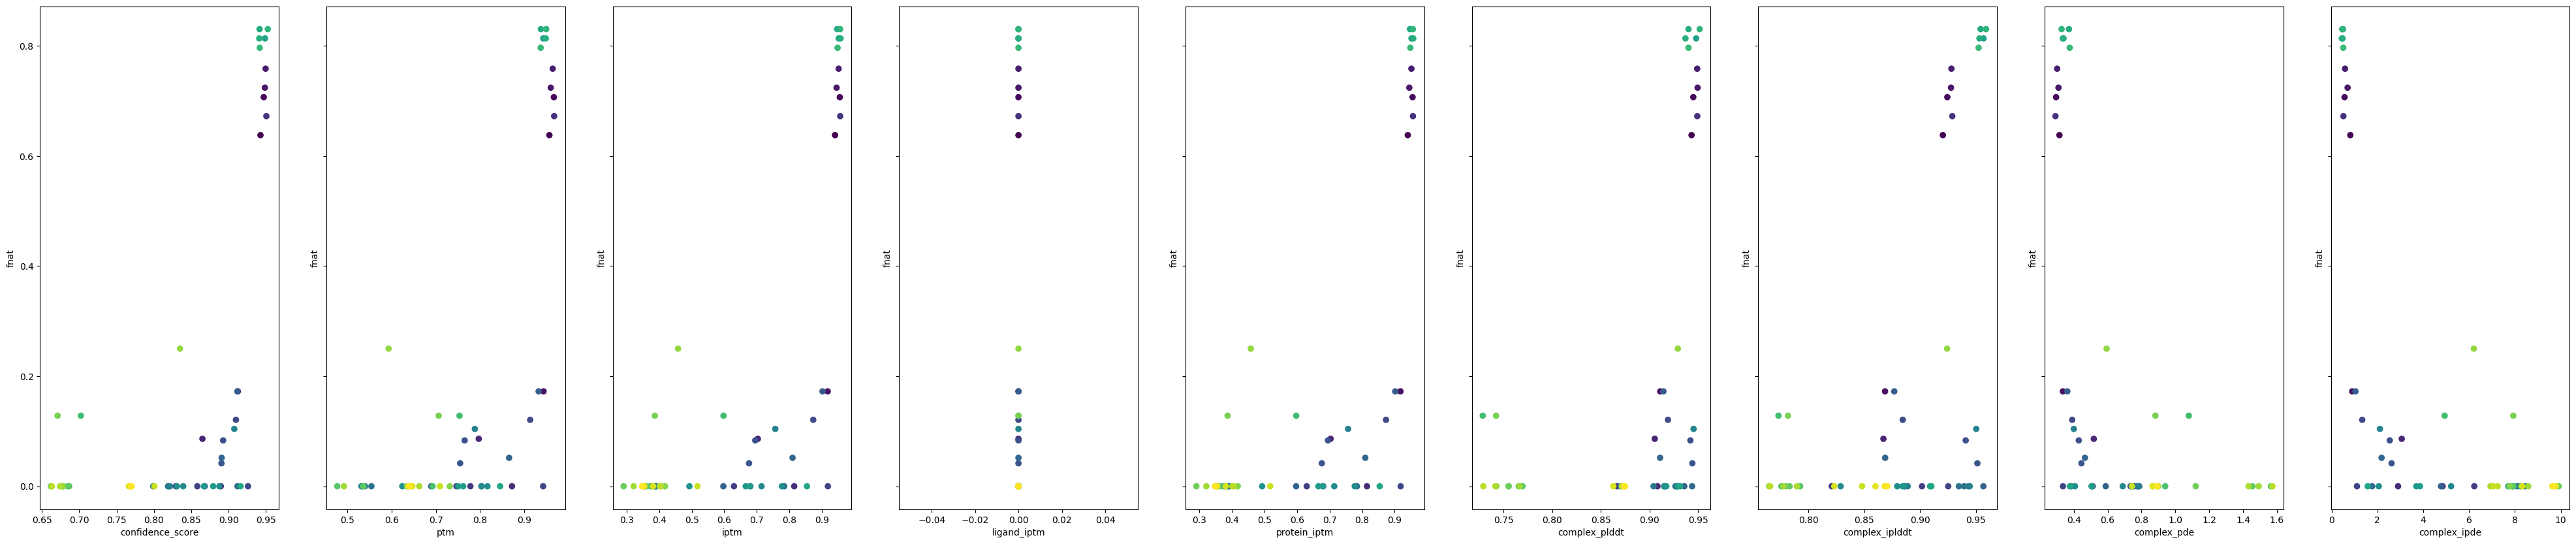

In [71]:
fig, axes = plt.subplots(ncols=len(relevant_json_keys), sharey=True, figsize=(50, 10))
for ax, key in zip(axes, relevant_json_keys):
    print(key)
    ax.scatter(combined_results[key], combined_results["fnat"], c=np.arange(len(combined_results)))
    ax.set_xlabel(key)
    ax.set_ylabel("fnat")

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

X_true = combined_results[relevant_json_keys].values
Y_true = combined_results[["fnat", "lrmsd", "irmsdbb"]].values

Y_true[:, 1:] = np.log(Y_true[:, 1:])
Y_true_capri = combined_results["capri"]

# regr.fit(X_true, Y_true)
# Y_pred = regr.predict(X_true)
regr = MLPRegressor(max_iter=2000, tol=0.1, solver="adam", hidden_layer_sizes=(100,))
regr.fit(X_true, Y_true)
Y_pred = regr.predict(X_true)
mse = mean_squared_error(Y_true, Y_pred)

reg = LinearRegression().fit(Y_pred, Y_true_capri)
Y_pred_capri = reg.predict(Y_pred)


print("MSE without validation:", mse)
kf = KFold(n_splits=5, shuffle=True)

mse_scores = []
regressors = []
for train_index, val_index in kf.split(X_true):

    X_train_fold, X_val_fold = X_true[train_index], X_true[val_index]
    Y_train_fold, Y_val_fold = Y_true[train_index], Y_true[val_index]

    # Train the model on the training fold

    regr.fit(X_train_fold, Y_train_fold)
    # Predict on the validation fold
    Y_pred_fold = regr.predict(X_val_fold)

    # Calculate and store the mean squared error for this fold
    mse = mean_squared_error(Y_val_fold, Y_pred_fold)
    mse_scores.append(mse)
    regressors.append(regr)

average_mse = np.mean(mse_scores)
print(f'Average MSE across 5 folds: {average_mse}')
print(sorted(mse_scores))

MSE without validation: 2.0557545123687357
Average MSE across 5 folds: 1.0958800657501881
[0.5868316305341404, 0.9080427234552939, 1.1202908959621258, 1.305551308482058, 1.558683770317323]


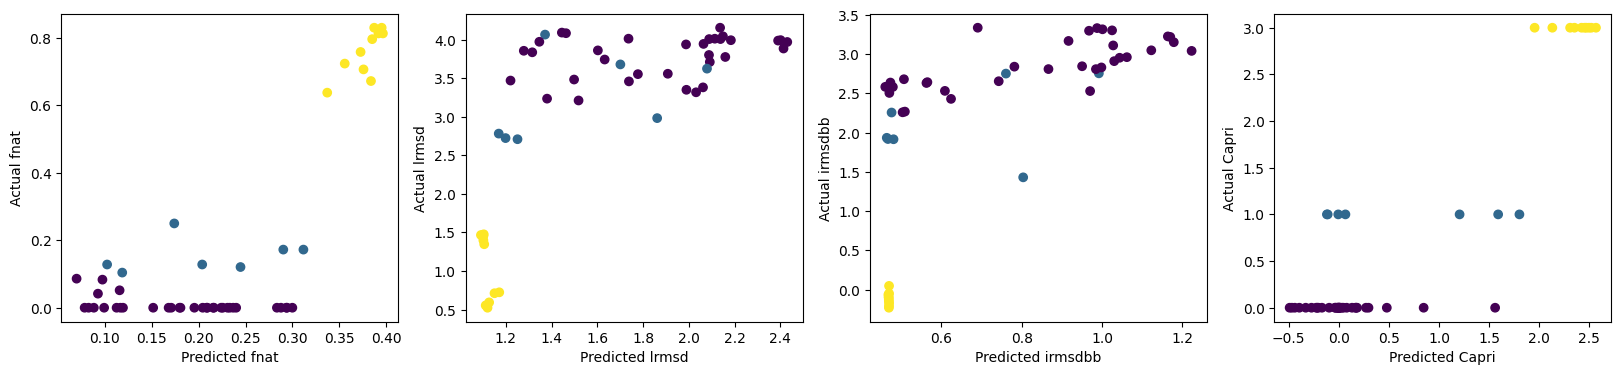

In [188]:
pred_class_df = pd.DataFrame(data=Y_pred, columns=["fnat", "lrmsd", "irmsdbb"])
pred_class_df[["lrmsd", "irmsdbb"]] = 0.5
pred_class_df["capri"] = [capri_score(pred_class_df.iloc[iX]) for iX in range(len(combined_results))]
true_class_df = pd.DataFrame(data=Y_true, columns=["fnat", "lrmsd", "irmsdbb"])
true_class_df["capri"] = [capri_score(true_class_df.iloc[iX]) for iX in range(len(combined_results))]

labels = ["fnat", "lrmsd", "irmsdbb"]
fig, axes = plt.subplots(ncols=4, figsize=(20, 4))
for iX in range(Y_pred.shape[-1]):
    ax = axes[iX]
    ax.scatter(Y_pred[:, iX], Y_true[:, iX], c=true_class_df["capri"])
    ax.set_xlabel(f"Predicted {labels[iX]}")
    ax.set_ylabel(f"Actual {labels[iX]}")

ax = axes[3]
ax.scatter(Y_pred_capri, true_class_df["capri"], c=true_class_df["capri"])
ax.set_xlabel("Predicted Capri")
ax.set_ylabel("Actual Capri")

plt.savefig("Regression_Results.pdf")

In [189]:
np.sum(np.round(Y_pred_capri).astype(int) == true_class_df["capri"]) / len(true_class_df)

0.68